In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
def test(asset):
    df = yf.download(asset, start='2021-01-01')
    # Simple Moving Average
    df['SMA'] = df.Close.rolling(window = 20).mean()
    # Standard Deviation
    df['SD'] = df.Close.rolling(window=20).std()
    df['Upper'] = df.SMA + 2*df.SD
    df['Lower'] = df.SMA - 2*df.SD
    df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
    df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)
    df.dropna(inplace = True)
    buys = []
    sells = []
    open_pos = False

    for i in range(len(df)):
        if df.Lower[i] > df.Close[i]:
            if open_pos == False:

                buys.append(i)
                open_pos = True

        elif df.Upper[i] < df.Close[i]:
            if open_pos == True:

                sells.append(i)
                open_pos = False

                
    plt.figure(figsize=(22,11))
    plt.plot(df[['Close','SMA','Upper','Lower']])
    plt.scatter(df.iloc[buys].index, df.iloc[buys].Close-(df.iloc[buys].Close/40), marker = '^',color='g')
    plt.scatter(df.iloc[sells].index, df.iloc[sells].Close+(df.iloc[sells].Close/40), marker = 'v',color='r')
    plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
    plt.legend(['Close','SMA','Upper','Lower'])
    plt.show
    merged = pd.concat([df.iloc[buys].Close,df.iloc[sells].Close], axis=1)
    merged.columns = ['Buys','Sells']
    profit = merged.shift(-1).Sells - merged.Buys
    relprofit = (merged.shift(-1).Sells - merged.Buys)/merged.Buys
    
    
    HODLprofit = df.iloc[len(df)-1]["Close"] - df.iloc[0]["Close"]
    relHODLprofit = (HODLprofit/df.iloc[0]["Close"])*100
    
    
    
    return 'Profit: $' + str(profit.sum()), 'Gains: ' + str(round(relprofit.mean()*100,2)) + '%', 'Buy and Hold Profits: $' + str(round(HODLprofit,2)), ' Relative B+H Profits ' + str(round(relHODLprofit,2)) + '%'

[*********************100%***********************]  1 of 1 completed


('Profit: $608.619873046875',
 'Gains: 4.65%',
 'Buy and Hold Profits: $36.56',
 ' Relative B+H Profits 1.14%')

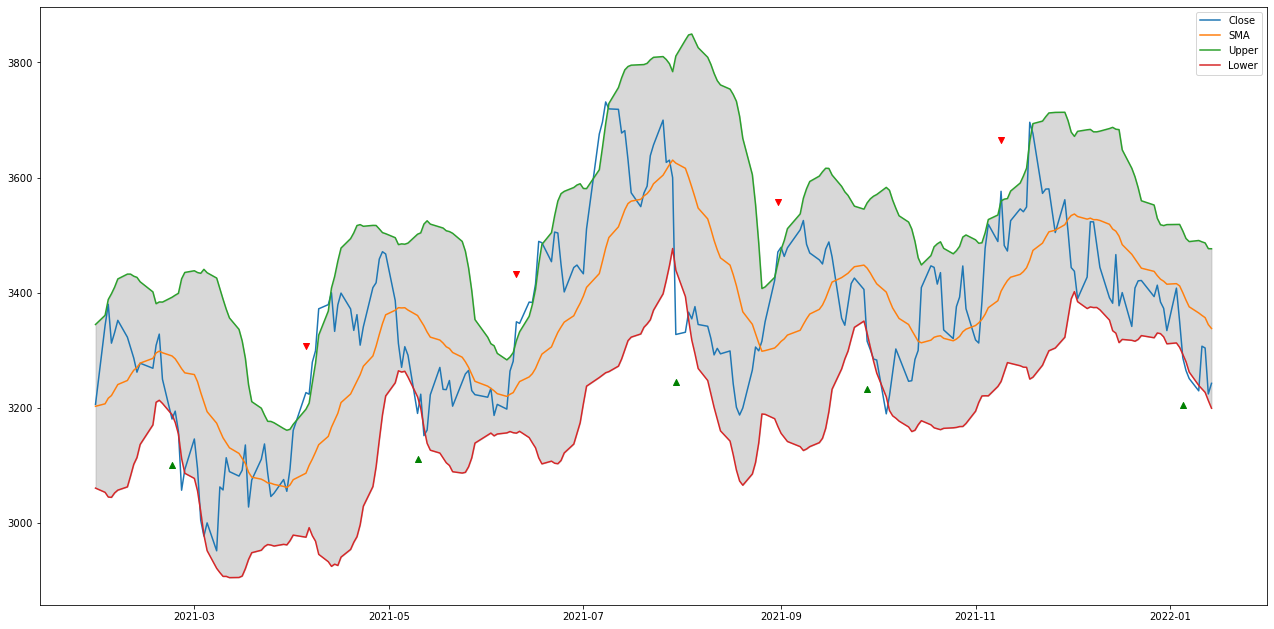

In [141]:
test('AMZN')


In [99]:
df.iloc[0]["Close"]

91.70999908447266

In [98]:
df.iloc[len(df)-1]["Close"]

136.8800048828125

In [87]:
df = yf.download('AMD', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [27]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,SMA,SD,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2021-01-19,1257.434570,1432.300049,1254.522949,1377.295898,1377.295898,47195935190,1115.582819,184.904216,1485.391251,745.774386,False,False
2021-01-20,1375.248413,1405.744141,1243.299927,1382.274048,1382.274048,46784030909,1147.806351,171.255675,1490.317701,805.295000,False,False
2021-01-21,1382.684448,1382.684448,1098.476196,1121.570923,1121.570923,45932464754,1167.366519,140.679323,1448.725165,886.007874,False,False
2021-01-22,1118.889038,1271.687622,1046.596558,1236.512207,1236.512207,43918338506,1190.465381,106.577404,1403.620190,977.310572,False,False
2021-01-23,1235.267944,1272.151123,1200.893311,1230.990601,1230.990601,27253895441,1203.239526,94.029119,1391.297764,1015.181289,False,False
2021-01-24,1231.210571,1395.111328,1225.274048,1391.609375,1391.609375,36418163554,1220.808344,94.792528,1410.393400,1031.223287,False,False
2021-01-25,1390.639893,1467.784912,1304.973999,1324.414795,1324.414795,43565777745,1232.028778,93.005375,1418.039529,1046.018027,False,False
2021-01-26,1323.741699,1376.085083,1253.340332,1357.058105,1357.058105,41572917750,1239.526074,96.855102,1433.236278,1045.815871,False,False
2021-01-27,1358.333374,1368.074097,1215.311279,1253.187134,1253.187134,39394416990,1240.901526,96.843424,1434.588373,1047.214679,False,False


In [4]:
# Simple Moving Average
df['SMA'] = df.Close.rolling(window = 20).mean()

In [5]:
# Standard Deviation
df['SD'] = df.Close.rolling(window=20).std()

In [6]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,SMA,SD
Date,,,,,,,,
2020-12-31,751.626648,754.299438,726.511902,737.803406,737.803406,13926846861,NaN,NaN
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358,NaN,NaN
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179,NaN,NaN
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368,NaN,NaN
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763,NaN,NaN
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781,NaN,NaN
2021-01-06,1101.005005,1209.428589,1064.233398,1207.112183,1207.112183,44699914188,NaN,NaN
2021-01-07,1208.078369,1282.579590,1167.443115,1225.678101,1225.678101,40468027280,NaN,NaN
2021-01-08,1225.967896,1273.827515,1076.081543,1224.197144,1224.197144,44334826666,NaN,NaN


In [7]:
df['Upper'] = df.SMA + 2*df.SD
df['Lower'] = df.SMA - 2*df.SD

In [8]:
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)

In [9]:
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

In [10]:
# Finding points where the Buy Signal is Triggered!
df[df['Buy_Signal'] == True]

,Open,High,Low,Close,Adj Close,Volume,SMA,SD,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2021-02-25,1625.393921,1670.224121,1465.058960,1475.703735,1475.703735,24481681873,1770.701831,127.803010,2026.307851,1515.095811,True,False
2021-02-26,1478.653320,1559.028931,1407.979248,1446.033691,1446.033691,31435997881,1759.111176,145.898136,2050.907448,1467.314903,True,False
2021-05-19,3382.657227,3437.935791,1952.460205,2460.679199,2460.679199,84482912776,3486.779065,448.859308,4384.497681,2589.060449,True,False
2021-05-21,2772.341309,2938.205078,2113.347168,2430.621338,2430.621338,53774070802,3461.569849,493.244893,4448.059635,2475.080062,True,False
2021-05-22,2436.014648,2483.983154,2168.124268,2295.705566,2295.705566,42089937660,3428.752319,547.752128,4524.256576,2333.248063,True,False
2021-05-23,2298.367188,2384.411621,1737.468750,2109.579834,2109.579834,56005721977,3362.677002,622.114693,4606.906388,2118.447616,True,False
2021-06-19,2235.159180,2278.415039,2168.885010,2178.499023,2178.499023,18765854896,2533.221887,176.360504,2885.942895,2180.500879,True,False
2021-06-21,2245.317871,2259.464111,1867.185425,1888.447510,1888.447510,33745173825,2472.539307,226.210008,2924.959324,2020.119290,True,False
2021-06-22,1886.667603,1993.159790,1707.600586,1874.950073,1874.950073,35547251725,2430.980560,255.492962,2941.966484,1919.994636,True,False


In [11]:
df.dropna(inplace = True)
len(df)

362

## Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

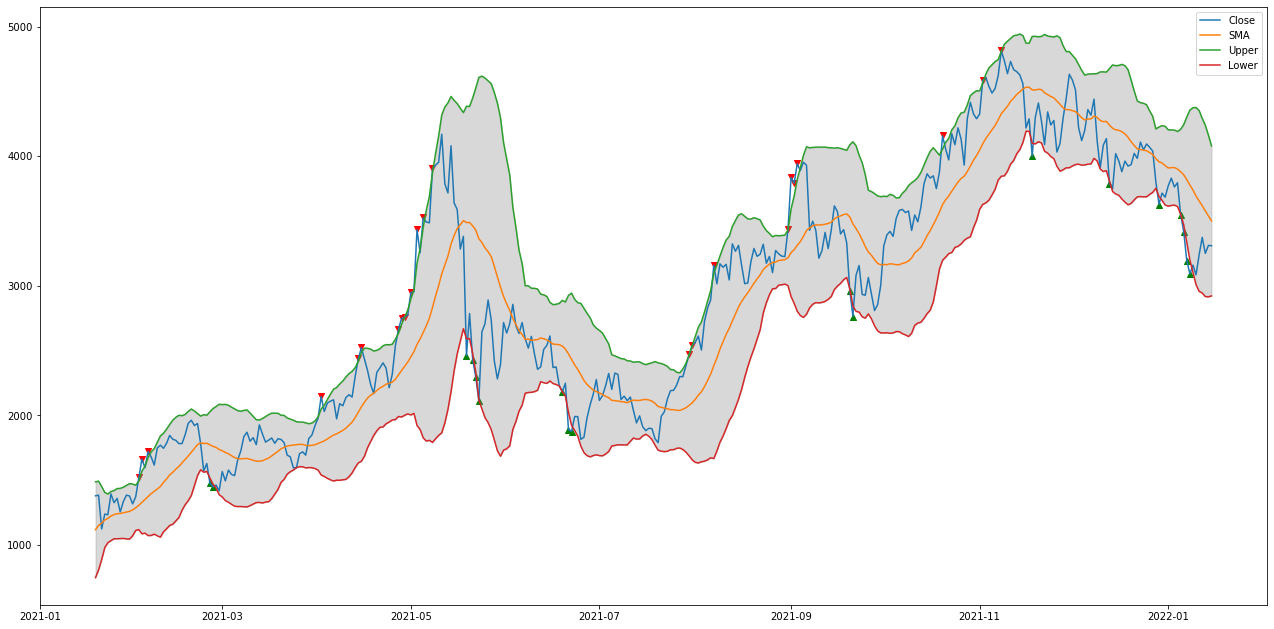

In [12]:
plt.figure(figsize=(22,11))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close-3, marker = '^',color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close+4, marker = 'v',color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show

In [13]:
df.index[df.Buy_Signal]

DatetimeIndex(['2021-02-25', '2021-02-26', '2021-05-19', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-06-19', '2021-06-21',
               '2021-06-22', '2021-09-20', '2021-09-21', '2021-11-18',
               '2021-12-13', '2021-12-29', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
    if df.Lower[i] > df.Close[i]:
        if open_pos == False:
            
            buys.append(i)
            open_pos = True
            
    elif df.Upper[i] < df.Close[i]:
        if open_pos == True:
            
            sells.append(i)
            open_pos = False

In [15]:
buys

[37, 120, 244, 303]

In [16]:
sells

[73, 192, 274]

<function matplotlib.pyplot.show(close=None, block=None)>

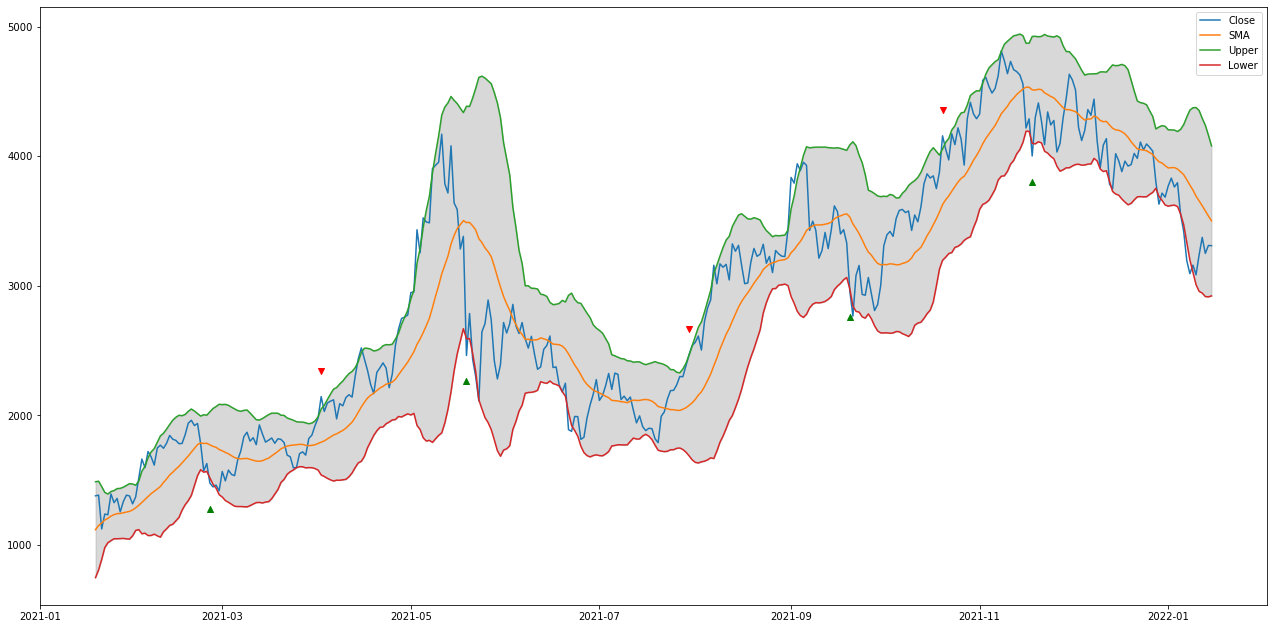

In [26]:
plt.figure(figsize=(22,11))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close-200, marker = '^',color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close+200, marker = 'v',color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show

In [18]:
merged = pd.concat([df.iloc[buys].Close,df.iloc[sells].Close], axis=1)

In [19]:
merged.columns = ['Buys','Sells']

In [20]:
merged

,Buys,Sells
Date,,
2021-02-25,1475.703735,NaN
2021-04-02,NaN,2143.225586
2021-05-19,2460.679199,NaN
2021-07-30,NaN,2466.961426
2021-09-20,2958.993408,NaN
2021-10-20,NaN,4155.992188
2021-11-18,4000.650879,NaN


In [21]:
profit = merged.shift(-1).Sells - merged.Buys

In [22]:
profit.sum()

1870.8028564453125

In [23]:
relprofit = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [24]:
relprofit.mean()*100

28.64744873848672

In [100]:
merged.Buys

Date
2021-02-25    1475.703735
2021-04-02            NaN
2021-05-19    2460.679199
2021-07-30            NaN
2021-09-20    2958.993408
2021-10-20            NaN
2021-11-18    4000.650879
Name: Buys, dtype: float64